<a href="https://colab.research.google.com/github/somustafa/asoiu-skillcamp/blob/main/WineQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning & Handling missing values (Lala)

In [916]:
import pandas as pd

In [917]:
df=pd.read_csv("/content/WineQuality.csv")

In [918]:
from sklearn.model_selection import train_test_split

X = df.drop("quality", axis=1)
y = df["quality"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [919]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1359, 11)
X_test shape: (340, 11)
y_train shape: (1359,)
y_test shape: (340,)


In [920]:
df.duplicated().sum()

np.int64(240)

In [921]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [922]:
df=df.drop_duplicates()
df.shape

(1459, 12)

In [923]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,8.322581,0.528159,0.272738,2.536439,0.088169,16.093888,47.302253,0.996712,3.310052,0.657568,10.430073,5.626463
std,1.720042,0.182356,0.194563,1.344330,0.049037,10.483027,33.182546,0.001870,0.154904,0.170222,1.081437,0.824518
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.100000,1.900000,0.069000,7.921819,22.000000,0.995580,3.210000,0.550000,9.500000,5.000000
50%,7.917558,0.520000,0.260000,2.200000,0.079000,14.000000,39.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.092000,22.000000,64.000000,0.997855,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [924]:
X = df.drop("quality", axis=1)
y = df["quality"]

In [925]:
df['quality'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)

# Outlier detection and treatment (Sona)

In [926]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [927]:

# Q1, Q3 train üzərində hesablanır
Q1 = np.percentile(X_train, 25, axis=0)
Q3 = np.percentile(X_train, 75, axis=0)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Train üçün mask
mask_train = ~((X_train < lower) | (X_train > upper)).any(axis=1)

X_train = X_train[mask_train]
y_train = y_train[mask_train]

print("Train shape after outlier removal:", X_train.shape)


# Test üçün eyni sərhədlər
mask_test = ~((X_test < lower) | (X_test > upper)).any(axis=1)

X_test = X_test[mask_test]
y_test = y_test[mask_test]

print("Test shape after outlier removal:", X_test.shape)

Train shape after outlier removal: (994, 11)
Test shape after outlier removal: (254, 11)


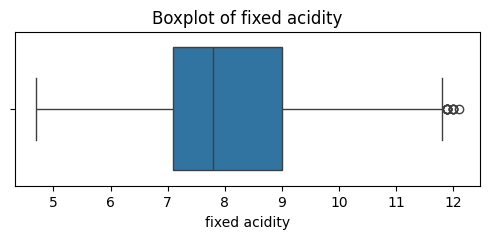

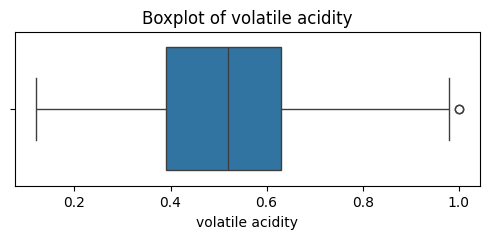

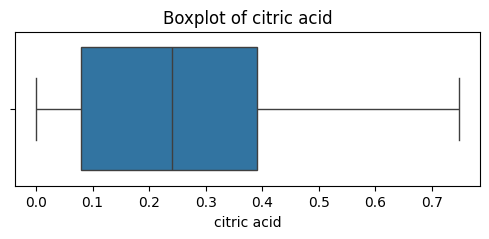

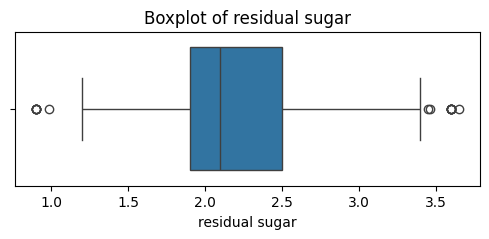

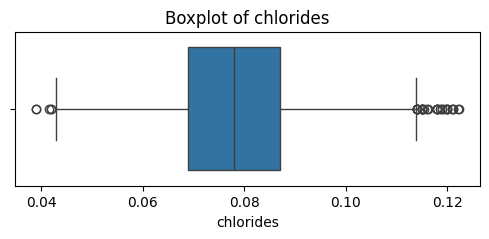

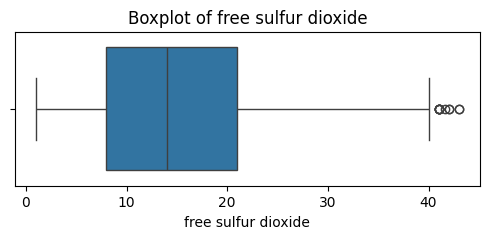

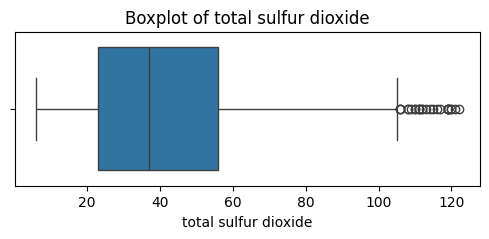

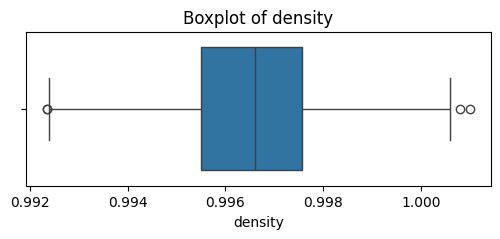

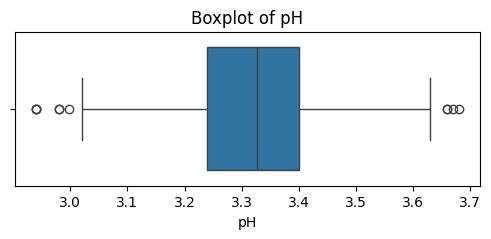

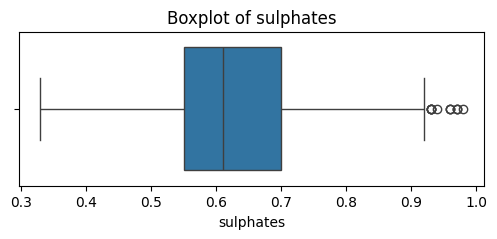

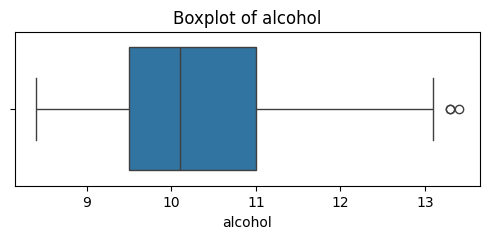

In [928]:
# Boxplot
def plot_boxplots(df):
    for col in df.columns:
        plt.figure(figsize=(6,2))
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot of {col}")
        plt.show()
plot_boxplots(X_train)

In [929]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)


In [930]:
def remove_outliers_iqr(X, y):
    Q1 = X.quantile(0.25)
    Q3 = X.quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    mask = ~((X < lower) | (X > upper)).any(axis=1)

    X_clean = X.loc[mask].reset_index(drop=True)
    y_clean = y.loc[mask].reset_index(drop=True)

    return X_clean, y_clean


In [931]:
X_train, y_train = remove_outliers_iqr(X_train, y_train)
X_test, y_test = remove_outliers_iqr(X_test, y_test)


In [932]:
# fixed acidity ucun train və test
# X_train = removal_box_plot(X_train, 'fixed acidity')
# X_test = removal_box_plot(X_test, 'fixed acidity')

# butun sutunlar ucun
# for col in X_train.columns:
#     X_train = removal_box_plot(X_train, col)
#     X_test = removal_box_plot(X_test, col)

In [933]:
print("After outlier removal:")
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)

After outlier removal:
X_train: (872, 11)
X_test : (234, 11)


# FeatureScaling (normalization,standardization) (Abalfaz)

In [934]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [935]:
minmax_scaler = MinMaxScaler()

X_train_norm = minmax_scaler.fit_transform(X_train)
X_test_norm = minmax_scaler.transform(X_test)

print("Normalized X_train shape:", X_train_norm.shape)
print("Normalized X_test shape:", X_test_norm.shape)

Normalized X_train shape: (872, 11)
Normalized X_test shape: (234, 11)


In [936]:
pd.DataFrame(X_train_norm, columns=X_train.columns).head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.802961,0.337209,0.735874,0.909091,0.466014,0.538462,0.484848,0.878049,0.213115,0.949153,0.279070
1,0.324439,0.360465,0.401386,0.363636,0.593109,0.128205,0.333333,0.129268,0.508197,0.220339,0.744186
2,0.590084,0.213717,0.603386,0.490049,0.280518,0.662762,0.174729,0.205908,0.083263,0.730291,0.083365
3,0.211845,0.372093,0.521801,0.590909,0.480136,0.128205,0.080808,0.384146,0.803279,0.610169,0.534884
4,0.422958,0.186047,0.401386,0.363636,0.268311,0.435897,0.282828,0.341463,0.426230,0.966102,0.604651


In [937]:
standard_scaler = StandardScaler()

X_train_std = standard_scaler.fit_transform(X_train)
X_test_std = standard_scaler.transform(X_test)

print("Standardized X_train shape:", X_train_std.shape)
print("Standardized X_test shape:", X_test_std.shape)

Standardized X_train shape: (872, 11)
Standardized X_test shape: (234, 11)


In [938]:
pd.DataFrame(X_train_std, columns=X_train.columns).head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1.787167,-0.675427,1.796396,2.422559,-0.111866,0.838797,0.551928,2.016319,-1.468050,2.360924,-0.471623
1,-0.806639,-0.553588,0.356180,-0.393812,0.575703,-1.075493,-0.079240,-1.986801,-0.014737,-1.483220,1.609342
2,0.633279,-1.322413,1.225939,0.258898,-1.115380,1.418793,-0.739939,-1.577073,-2.107582,1.206534,-1.347219
3,-1.416946,-0.492669,0.874658,0.779676,-0.035470,-1.075493,-1.131187,-0.624175,1.438576,0.572950,0.672908
4,-0.272620,-1.467380,0.356180,-0.393812,-1.181419,0.360225,-0.289630,-0.852366,-0.418435,2.450322,0.985052


# Categorial encoding(OHE) (Vusala)

In [939]:
df.head()
df.shape

(1459, 12)

In [940]:
df.dtypes

,0
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


In [941]:
categorical_cols = df.select_dtypes(include=["object"]).columns
categorical_cols

Index([], dtype='object')

# Linear Regression and Train Data




In [942]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# 1. Klası yenidən təyin edirik (Bütünlük üçün)
class LinearRegressionCustom:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.W = None
        self.b = None

    def fit(self, X, y):
        m, n = X.shape
        self.W = np.zeros(n)
        self.b = 0
        for i in range(self.num_iterations):
            y_pred = np.dot(X, self.W) + self.b
            dw = (1 / m) * np.dot(X.T, (y_pred - y))
            db = (1 / m) * np.sum(y_pred - y)
            self.W -= self.learning_rate * dw
            self.b -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.W) + self.b

# 2. Sənin kodundakı SON dəyişən adlarını bura bağlayırıq
# Qeyd: Yuxarıdakı koduna əsasən bunlar X_train_std və y_train-dir
X_input = X_train_std
y_input = y_train.values

X_test_input = X_test_std
y_test_input = y_test.values

# 3. Modeli Yaradırıq və Öyrədirik
lin_model = LinearRegressionCustom(learning_rate=0.01, num_iterations=2000)
lin_model.fit(X_input, y_input)

# 4. Proqnoz
y_lin_pred = lin_model.predict(X_test_input)

# 5. EVALUATION (Metrikalar)
# Accuracy üçün həm həqiqi, həm təxmin edilən dəyərləri tam rəqəmə (int) çeviririk
y_test_int = y_test_input.astype(int)
y_pred_int = np.round(y_lin_pred).astype(int)

mse = mean_squared_error(y_test_int, y_lin_pred)
r2 = r2_score(y_test_int, y_lin_pred)
acc = accuracy_score(y_test_int, y_pred_int)

print("="*40)
print("   LINEAR REGRESSION FINAL RESULTS")
print("="*40)
print(f"Mean Squared Error (MSE):    {mse:.4f}")
print(f"R-squared (R2 Score):       {r2:.4f}")
print(f"Exact Match Accuracy:        {acc * 100:.2f}%")
print("="*40)

   LINEAR REGRESSION FINAL RESULTS
Mean Squared Error (MSE):    0.4367
R-squared (R2 Score):       0.2903
Exact Match Accuracy:        52.14%



      LINEAR REGRESSION FINAL REPORT
Mean Squared Error (MSE)  | 0.4367
R-squared (R2 Score)      | 0.2903
Exact Match Accuracy      | 52.14%


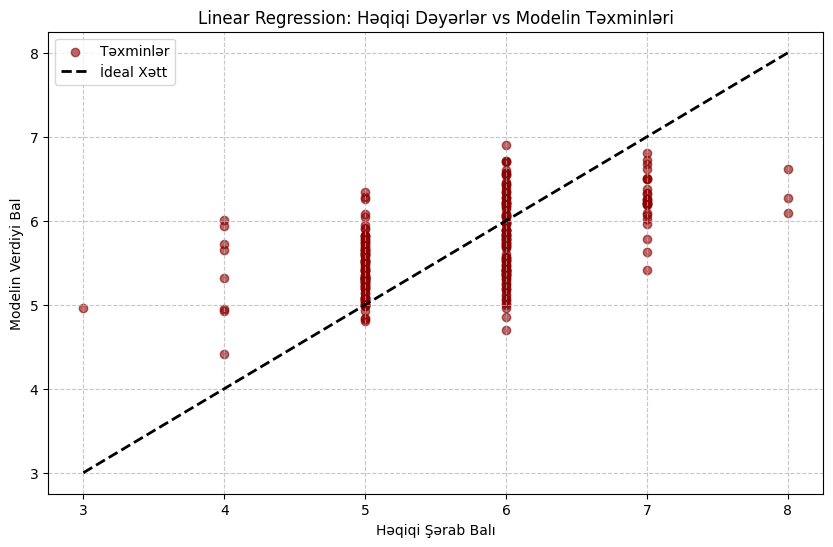

In [943]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# 1. Dəyişənləri birbaşa mövcud olanlara bağlayırıq (Xətanın qarşısını almaq üçün)
# Əgər y_test_reg yoxdursa, y_test-dən istifadə et
try:
    y_true = y_test.values if hasattr(y_test, 'values') else y_test
except NameError:
    print("Xəta: 'y_test' dəyişəni tapılmadı. Zəhmət olmasa outlier təmizləmə hücrəsini yenidən işlədin.")

# 2. Tipləri dəqiqləşdiririk
y_lin_pred_rounded = np.round(y_lin_pred).astype(int)
y_true_int = y_true.astype(int)

# 3. Metrikaları hesablayırıq
mse = mean_squared_error(y_true_int, y_lin_pred)
r2 = r2_score(y_true_int, y_lin_pred)
accuracy = accuracy_score(y_true_int, y_lin_pred_rounded)

# 4. NƏTİCƏLƏRİ ÇAP EDİRİK
print("\n" + "="*45)
print("      LINEAR REGRESSION FINAL REPORT")
print("="*45)
print(f"{'Mean Squared Error (MSE)':<25} | {mse:.4f}")
print(f"{'R-squared (R2 Score)':<25} | {r2:.4f}")
print(f"{'Exact Match Accuracy':<25} | {accuracy * 100:.2f}%")
print("="*45)

# 5. VİZUALLAŞDIRMA
plt.figure(figsize=(10, 6))
plt.scatter(y_true_int, y_lin_pred, color='darkred', alpha=0.6, label='Təxminlər')
plt.plot([y_true_int.min(), y_true_int.max()],
         [y_true_int.min(), y_true_int.max()],
         'k--', lw=2, label='İdeal Xətt')

plt.title("Linear Regression: Həqiqi Dəyərlər vs Modelin Təxminləri")
plt.xlabel("Həqiqi Şərab Balı")
plt.ylabel("Modelin Verdiyi Bal")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Logistic Regression and Train Model

In [944]:
df['quality_binary'] = (df['quality'] >= 6).astype(int)


In [945]:
# Features və target
X = df.drop(['quality', 'quality_binary'], axis=1)
y = df['quality_binary']

In [946]:
y_train_clean = y_train.loc[X_train.index]
y_test_clean = y_test.loc[X_test.index]


In [947]:
X_train_b = np.c_[np.ones((X_train_std.shape[0], 1)), X_train_std]
X_test_b = np.c_[np.ones((X_test_std.shape[0], 1)), X_test_std]

y_train_array = (y_train_clean >= 6).astype(int).values
y_test_array = (y_test_clean >= 6).astype(int).values

In [948]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def compute_cost(X, y, beta):
    m = len(y)
    h = sigmoid(X @ beta)
    epsilon = 1e-15
    h = np.clip(h, epsilon, 1 - epsilon)

    cost = -1/m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost


def gradient_descent(X, y, beta, learning_rate, num_iterations):
    """Gradient descent optimization"""
    m = len(y)
    cost_history = []

    for i in range(num_iterations):
        h = sigmoid(X @ beta)

        gradient = 1/m * X.T @ (h - y)

        beta = beta - learning_rate * gradient

        cost = compute_cost(X, y, beta)
        cost_history.append(cost)

        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost:.4f}")

    return beta, cost_history


def predict(X, beta, threshold=0.5):
    probabilities = sigmoid(X @ beta)
    predictions = (probabilities >= threshold).astype(int)
    return predictions, probabilities


In [949]:
# Parametrləri initialize edirik
np.random.seed(42)
beta_initial = np.random.randn(X_train_b.shape[1]) * 0.01

# Hyperparameters
learning_rate = 0.1
num_iterations = 1000

# Training
beta_optimal, cost_history = gradient_descent(
    X_train_b,
    y_train_clean.values,
    beta_initial,
    learning_rate,
    num_iterations
)
y_test_pred, y_test_prob = predict(X_test_b, beta_optimal)


print("TRAINING is done!")

print(f"Intercept (beta_0): {beta_optimal[0]:.4f}")
print(f"Coefficients (beta_1 ... beta_n):")
for i, col in enumerate(X_train.columns):
    print(f"  {col}: {beta_optimal[i+1]:.4f}")

Iteration 0: Cost = -1.9892
Iteration 100: Cost = -159.9274
Iteration 200: Cost = -160.5036
Iteration 300: Cost = -160.5036
Iteration 400: Cost = -160.5036
Iteration 500: Cost = -160.5036
Iteration 600: Cost = -160.5036
Iteration 700: Cost = -160.5036
Iteration 800: Cost = -160.5036
Iteration 900: Cost = -160.5036
TRAINING is done!
Intercept (beta_0): 464.8698
Coefficients (beta_1 ... beta_n):
  fixed acidity: 8.4352
  volatile acidity: -28.0586
  citric acid: 17.6061
  residual sugar: 1.4238
  chlorides: -14.1360
  free sulfur dioxide: -1.1544
  total sulfur dioxide: -13.0673
  density: -18.4139
  pH: -6.6612
  sulphates: 33.7499
  alcohol: 38.6200


In [950]:
y_test_pred, y_test_prob = predict(X_test_b, beta_optimal)

--- LOGISTIC REGRESSION EVALUATION ---
Accuracy (Dəqiqlik): 0.5726
Precision:           0.5726
Recall (Həssaslıq):  1.0000
F1-Score:            0.7283

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       100
           1       0.57      1.00      0.73       134

    accuracy                           0.57       234
   macro avg       0.29      0.50      0.36       234
weighted avg       0.33      0.57      0.42       234



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


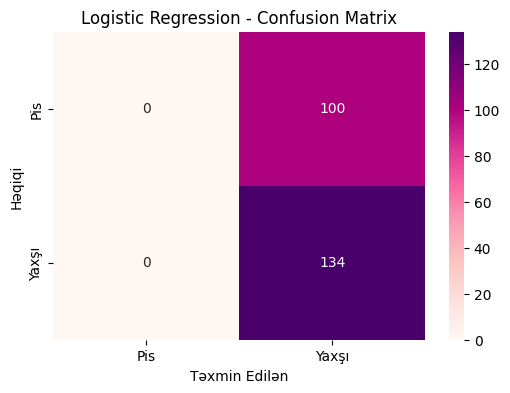

In [951]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Metrikaların hesablanması
accuracy = accuracy_score(y_test_array, y_test_pred)
precision = precision_score(y_test_array, y_test_pred)
recall = recall_score(y_test_array, y_test_pred)
f1 = f1_score(y_test_array, y_test_pred)

print("--- LOGISTIC REGRESSION EVALUATION ---")
print(f"Accuracy (Dəqiqlik): {accuracy:.4f}")
print(f"Precision:           {precision:.4f}")
print(f"Recall (Həssaslıq):  {recall:.4f}")
print(f"F1-Score:            {f1:.4f}")

# 2. Detallı Classification Report
print("\nClassification Report:")
print(classification_report(y_test_array, y_test_pred))

# 3. Confusion Matrix Vizuallaşdırma
cm = confusion_matrix(y_test_array, y_test_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='RdPu', xticklabels=['Pis', 'Yaxşı'], yticklabels=['Pis', 'Yaxşı'])
plt.title('Logistic Regression - Confusion Matrix')
plt.xlabel('Təxmin Edilən')
plt.ylabel('Həqiqi')
plt.show()